# numpy save simulation results
in this we will save simulation results needed for graphs.

In [1]:
#Variables to play with, eventually will be deprecated:
bin_number = 30

In [2]:
#Import Statements & Define Constants
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.stats as stats
from scipy.stats import lognorm
from scipy.stats import ks_2samp
import math
import rebound
import random
from numpy.random import seed, random
from scipy.stats import rayleigh
from scipy.stats import norm
import itertools
from spock import FeatureClassifier
from decimal import Decimal
import pandas as pd
from tqdm import tqdm
from matplotlib.ticker import EngFormatter
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

fmodel = FeatureClassifier()
earth_mass = 5.97219*10**24
sun_mass = 1.981 * 10**30
mass_ratio = earth_mass/sun_mass

/home/miniconda3/envs/kaichen/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: /home/miniconda3/envs/kaichen/lib/python3.10/site-packages/torchvision/image.so: undefined symbol: _ZN2at4_ops19empty_memory_format4callEN3c108ArrayRefIlEENS2_8optionalINS2_10ScalarTypeEEENS5_INS2_6LayoutEEENS5_INS2_6DeviceEEENS5_IbEENS5_INS2_12MemoryFormatEEE
  warn(f"Failed to load image Python extension: {e}")


[06:08:14] WARNING: /croot/xgboost-split_1675457761144/work/src/learner.cc:888: Found JSON model saved before XGBoost 1.6, please save the model using current version again. The support for old JSON model will be discontinued in XGBoost 2.3.


# Load NASA Exoplanet Archive data needed
Use archive to find planets that have compact inner period ratios

In [3]:
# load data of planets that have inner period ratio 1.1-1.5
df = pd.read_csv("compact_planet_data.csv", index_col=0)
df.head()

,Planet Name,Host Name,Orbital Period,Discovery Method,Semi-Major Axis (AU),Eccentricity,Radius (R_earth),Mass or Mass * sin(i) (M_earth),Stellar Mass (M_sun)
119,DMPP-1 b,DMPP-1,18.570,Radial Velocity,0.1462,0.083,5.29,24.27,1.21
120,DMPP-1 c,DMPP-1,6.584,Radial Velocity,0.0733,0.057,3.06,9.60,1.21
122,DMPP-1 e,DMPP-1,5.516,Radial Velocity,0.0651,0.070,1.86,4.13,1.21
194,GJ 180 b,GJ 180,17.133,Radial Velocity,0.0920,0.070,2.43,6.49,0.43
195,GJ 180 c,GJ 180,24.329,Radial Velocity,0.1290,0.090,2.41,6.40,0.43


# load from prelim .npy

In [13]:
pratios_observed = np.load('pratios_observed.npy')

In [ ]:
# waldo don't copy between here

In [14]:
kde_changing = np.load('kde_changing.npy')

In [9]:
e_list = np.load('e_list.npy')
m_list = np.load('m_list.npy')

# Dispersion for observed systems
D = 0.302449556680029

error = 0.0180067880312394 (SEM)

In [11]:
D = 0.302449556680029
D_error = 0.0180067880312394

In [12]:
# function to check if planet is crossing
def check_crossing(sim):
    ps = sim.particles
    for i1 in range(1,sim.N-1):
        i2 = i1+1 # next planet out 
        EMx = ps[i1].e*np.cos(ps[i1].pomega) - ps[i2].e*np.cos(ps[i2].pomega)
        EMy = ps[i1].e*np.sin(ps[i1].pomega) - ps[i2].e*np.sin(ps[i2].pomega)
        EM = np.sqrt(EMx**2 + EMy**2)
        EMcross = (ps[i2].a-ps[i1].a)/ps[i2].a
        if EM > EMcross:
            return True
    return False


# How to replicate data with SPOCK
We want to replicate the period ratio data using SPOCK. In order to do this, we start off by setting a range of eccentricities, masses, and period ratios to choose from. Based on KDE from observational data, there is different probabilities of obtaining certain parameters.

We generate simulations and determine their probability of surviving. We want to replicate the same number of systems observed with compact period ratios (99), so we generate 50 systems (2 period ratios each). We choose to use a system by generating a random number from 0 to 1, and if that number is less than the probability of the simulated system surviving, we use that system. Ex: If a simulated system has a 80% chance of surviving, there is an 80% chance that the random number will be under it, and we use it for a system that exists in our simulated world. 

[1.2048757214867627, 1.1798946286576315, 1.1529698547189502, 1.1275517081597906, 1.1142284535
358244, 1.1872134591238819, 1.1471707874801513, 1.104527123197601, 1.1463955852266585, 1.1289
175761613786, 1.1655861757918335, 1.163080743785359, 1.0724427754359631, 1.0894527101438598, 
1.2339383271020201, 1.0468371221896249, 1.1375220397121677, 1.1222601110257837, 1.20587712401
4787, 1.154639483089483, 1.1656112848271558, 1.1697881640355958, 1.1593907713847913, 1.190565
2148651835, 1.16531966691198, 1.12406724338458, 1.1538724307637227, 1.1356159192611623, 1.149
686082592933, 1.1403871036563105, 1.1844723365332313, 1.148514491524911, 1.221206769701448, 1
.0547187438970234, 1.2150467449793403, 1.088075271011225, 1.212886142117181, 1.09099095661670
42, 1.1179019313926815, 1.1305506460766324, 1.142464109651502, 1.2149131449507609, 1.10927849
19374925, 1.158307659704706, 1.196604992305744, 1.166846432492103, 1.179974220180927, 1.09649
48306569247, 1.124469944943217, 1.22813891353238, 1.08736950

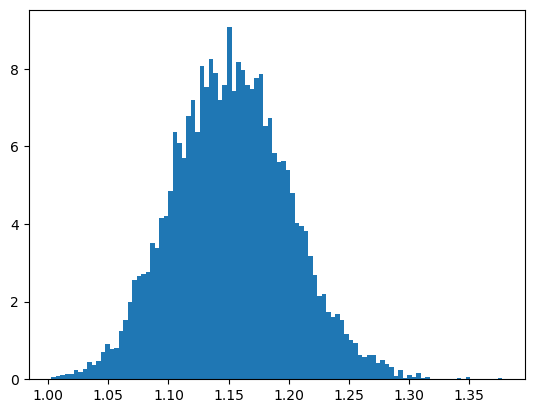

In [591]:
#waldo code
def simulate_trios(D, error):
    """generates periods based on dispersion"""
    p1period = 1
    p2period = 1.3#np.random.uniform(1.1,1.5) # thus pratio 1.1-1.5
    p3period = 0
    # calculate last period
    while p3period < p2period:
        s12= math.log10(p2period/p1period) #log of pratio1
        #s23_error = (2/((1+D)**2))*(error) # propogates error for log(pratio2)
        #s23_middle= s12*(1-D)/(1+D) # log(pratio2), no error
#         print(10**s23_middle)
        s23 = np.random.normal(s12, s12*D)*(1-D)/(1+D) # dispersion is a ratio, we dont know if pos or neg
        #s23 = np.random.normal(s23_middle, s23_middle*s23_error) #s23_middle*s23_error? # chooses random pratio between error vals
        p3period = p2period*10**s23 # calculate period 3
    #print(p3period)
#     print(p3period/p2period)
    pratio2 = p3period/p2period
    return pratio2 #[p1period,p2period,p3period]

trioslist=[simulate_trios(.302449556680029, 0.226708237758116) for i in range(0,10000)]
# make histogram with inner pratio 1.3, 
plt.hist(trioslist, bins = 100, density = True)
trioslist

In [585]:
# saving pvalues for each trial
trials_pvalue_mean = []


In [586]:
from tqdm import tqdm 

# this saves lists of lists so we can save each from each ecc change
ecc_cumsum = []
ecc_final_pratios = [] 
ecc_pvalue = []
ecc_final_stability = []
ecc_final_simulations = []
ecc_final_all_pratios = []
ecc_final_bad_pratios = []
ecc_final_periods = []
ecc_inner_pratios = []
ecc_outer_pratios = []
final_dispersion = []



# multiple trials to take an average CHANGE
num_experiments = 50





for a in range(len(stdev_changing)):
    print('ECCENTRICITY ' + str(a+1)+'/5')
    
    #This initializes the lists that populations can be added into
    trials_cumsum = []
    trials_final_pratios = [] 
    trials_pvalue = []
    trials_final_stability = []
    trials_final_simulations = []
    trials_final_bad_pratios = []
    trials_final_all_pratios = []
    trials_final_periods = []
    trials_inner_pratios = []
    trials_outer_pratios = []
    dispersion_list = []
    stdev = stdev_changing[a]
    
    for q in tqdm(range(num_experiments)):
#         if q % 20 == 0:
#             print(str(q+1)+'/'+str(num_experiments)) # print how many exp run every 20 exp
        spock_e_list = [] # final eccentricities of planets
        spock_p_list = [] # final period ratios of planets
        all_pratios = []
        bad_p_list = []
        spock_m_list = [] # final masses of planets
        final_stability = [] # final probabilities of each simulated system being stable
        final_simulations = [] # final simulations used
        inner_pratios = []
        outer_pratios = []
        final_periods = []
        #CHANGE
        while len(spock_p_list) < 71: # run until we get to 71 "simulated observations" 1.1-1.5
            #Get eccentricity and mass randomly
            #We're are testing a single system of 3 planets
            i = int(np.random.uniform(0,10000))
            temp_e1 = e_list[3*i] # choose random eccentricity, is there a reason why this is how it's randomly chosen
            temp_e2 = e_list[3*i+1]
            temp_e3 = e_list[3*i+2]
            temp_m1 = m_list[3*i] 
            temp_m2 = m_list[3*i+1] 
            temp_m3 = m_list[3*i+2] 
            # Get periods based on pearson r requirement and period distribution. 
            #Initialize to base values
            base_period = 1  #PLay with this value based on observed periods, but might not matter
            #.44 pearson r?
            
            d = dispersion(trios=get_trios(Plist = plist))[0] # dispersion #0.1161#0.1161 #This standard deviation sets the pearson r change by 50%
#             d_error = dispersion(trios=get_trios(Plist = plist))[1] # dispersion error
#             pratio1 = p_list[int(np.random.uniform(0,num_iter))] # choose a ratio between planet, choose from array of random period ratios between 1.1-1.5
#             pratio2_log = np.random.normal(pratio1,stdev*pratio1) #Use random.normal to imitate pearson r - tune stdev to desired pearson r
#             pratio2 = 10**pratio2_log
            period_1 = 1
            period_2 = np.random.uniform(1.1, 1.5)
            pratio1 = period_2/period_1
            s12 = np.log10(pratio1)
            
            s23 = np.random.normal(loc=s12, scale=stdev*s12)
            period_3 = period_2 * 10 ** s23
            pratio2 = period_3/period_2
            #Set the periods based on period ratios and base period
    
    
#             period_1, period_2, period_3 = simulate_trios(d, d_error)
#             pratio1 = period_2/period_1
#             pratio2 = period_3/period_2
#             period_1 = base_period


#             period_2 = period_1 * pratio1
#             period_3 = period_2 * pratio2

            # Making the 3planet temporary simulation
            temp_sim = rebound.Simulation()
            temp_sim.add(m=1) #Can possibly change mass of star, but might not matter
            temp_sim.add(m=temp_m1*mass_ratio, P = period_1, e = temp_e1)
            temp_sim.add(m=temp_m2*mass_ratio, P = period_2, e = temp_e2)
            temp_sim.add(m=temp_m3*mass_ratio, P = period_3, e = temp_e3)



            # Test stability of the temporary simulation
            temp_stability = fmodel.predict_stable(temp_sim)# get its spock probability for both groups of planets inner/outer

            # sets simulation stability to 0 if orbits cross
            if check_crossing(temp_sim):
                temp_stability = 0

            r = np.random.random() # this generates a random number from 0-1
            if r < temp_stability: # condition will trigger temp_stability% of the time
                final_simulations.append(temp_sim) # append simulation to our list of "simulated observations" that survived
                spock_p_list.append(pratio1)
                if (pratio2 > 1.1 and pratio2 < 1.5): #between constraints for small p ratio
                    spock_p_list.append(pratio2)
                else:
                    bad_p_list.append(pratio2)
                inner_pratios.append(pratio1)
                outer_pratios.append(pratio2)
                all_pratios.append(pratio1)
                all_pratios.append(pratio2)
                #NEED TO FIGURE OUT
                spock_e_list.append(temp_e1)
                spock_e_list.append(temp_e2)
                spock_e_list.append(temp_e3)
                spock_m_list.append(temp_m1)
                spock_m_list.append(temp_m2)
                spock_m_list.append(temp_m3)
                final_stability.append(temp_stability) # append stability probability to list of stabilities that survived
                final_periods.append([period_1,period_2,period_3]) #trios!

            else:
                pass # simulated observation was unsuccessful. Continue to making a new system and repeat

        # make cdf in spock_p_cumsum
        spock_p_values, spock_p_base = np.histogram(spock_p_list, bins=np.linspace(1.1, 1.51, bin_number))
        spock_p_cumsum = np.cumsum(spock_p_values)/max(np.cumsum(spock_p_values)) #cdf!!!

        # ks test
        ksprob = scipy.stats.kstest(np.array(spock_p_list), np.array(pratios_observed), args=(), alternative='two-sided', method='exact')       
        pvalue = ksprob[1]
        
        # dispersion
        dispersion_list.append(dispersion(trios=final_periods)[0])
        
        # SAVE DATA FROM EACH TRIAL, from all 71 runs, list of 71
        trials_pvalue.append(pvalue)
        trials_final_stability.append(final_stability) # list of stability arrays for each trial
        trials_final_pratios.append(spock_p_list) # list of period ratios for each trial
        trials_final_all_pratios.append(all_pratios)
        trials_final_bad_pratios.append(bad_p_list)
        trials_inner_pratios.append(inner_pratios)
        trials_outer_pratios.append(outer_pratios)
        trials_cumsum.append(spock_p_cumsum) # list of all cdfs corresponding to the period ratios 
        trials_final_simulations.append(final_simulations)
        trials_final_periods.append(final_periods)
    
    
    # list of list, from each change in eccentricity value
    final_dispersion.append(statistics.mean(dispersion_list))
    ecc_pvalue.append(trials_pvalue)
    ecc_final_stability.append(trials_final_stability) # list of stability arrays for each trial
    ecc_final_pratios.append(trials_final_pratios) # list of period ratios for each trial
    ecc_final_all_pratios.append(trials_final_all_pratios)
    ecc_final_bad_pratios.append(trials_final_bad_pratios)
    ecc_cumsum.append(trials_cumsum) # list of all cdfs corresponding to the period ratios 
    ecc_final_simulations.append(trials_final_simulations)
    ecc_final_periods.append(trials_final_periods)
    ecc_inner_pratios.append(trials_inner_pratios)
    ecc_outer_pratios.append(trials_outer_pratios)
    
    trials_pvalue_mean.append(np.asarray(trials_pvalue).mean())

ECCENTRICITY 1/5


 34%|███████████████████▋                                      | 17/50 [24:21<47:36, 86.55s/it]/home/miniconda3/envs/kaichen/lib/python3.10/site-packages/spock/feature_functions.py:74: RuntimeWarning: invalid value encountered in scalar power
  s = np.abs(np.sqrt(m1+m2)*(EM/EMcross)**((b-a)/2.)/nres)
100%|████████████████████████████████████████████████████████| 50/50 [1:12:50<00:00, 87.42s/it]


ECCENTRICITY 2/5


100%|████████████████████████████████████████████████████████| 50/50 [1:05:24<00:00, 78.48s/it]


ECCENTRICITY 3/5


100%|████████████████████████████████████████████████████████| 50/50 [1:02:42<00:00, 75.25s/it]


In [575]:
# statistics.mean(dispersion_list)
final_dispersion

[0.30761670809118385]

In [582]:
trials_pvalue_mean
# statistics.stdev(dispersion_list)

[0.469715722261428]

In [570]:
dispersion(trios=final_periods)

(0.2991158689828158, 0.011139574612668285)

In [577]:
spock_p_list

[1.4178912015908887, 1.394927750768642, 1.4576878042843449, 1.392145171334514, 1.428090883066
0637, 1.4555924789202526, 1.4318408330127133, 1.2781562378412827, 1.4545839269837206, 1.33837
298136303, 1.4088539610221138, 1.4483000744898593, 1.2874023599109796, 1.4776637792163974, 1.
3170814431898346, 1.2952514103315371, 1.4039755087430366, 1.1673637450614227, 1.4014574290510
886, 1.4192996059746372, 1.48729647633444, 1.4921234988760967, 1.3187323218016587, 1.38286463
04100287, 1.4736578048477542, 1.4764788727135525, 1.422628749764184, 1.4867856405958029, 1.48
50967059135558, 1.3613470041812465, 1.4160338597576339, 1.438960641017129, 1.2517758971653414
, 1.246735571943071, 1.2665159286935932, 1.3026689901281419, 1.4686228969692343, 1.3839067641
334826, 1.4888186903291478, 1.4848045553913738, 1.2515285550036221, 1.4925676647677388, 1.440
1656320721323, 1.3086694119053448, 1.3540728844784646, 1.4085324746743422, 1.4721124679999271
, 1.4384710984302593, 1.4801109301248874, 1.3723879613174095

In [578]:
outer_pratios


[1.5257732870951608, 1.5029543544780524, 2.09058793559221, 2.6384504594356537, 2.345488617098
4124, 2.1503328024557407, 1.6687502855595633, 1.6253236938534537, 2.059521663659071, 1.887612
4591330075, 2.9159885613510554, 1.9159188368594302, 1.6944143305865782, 1.8383123087480422, 1
.5260796552108455, 1.8662242962045699, 1.1673637450614227, 2.188734717284445, 1.5532541729394
669, 1.7519766154530736, 2.110545497638707, 1.3828646304100287, 1.6813197389212984, 1.8555082
289754379, 3.1128829229726294, 2.422778890581322, 1.3613470041812465, 1.7691739910930389, 1.5
34761709173073, 1.246735571943071, 1.6657591388995814, 1.6708907650622244, 1.5204192396134972
, 1.6501174126007898, 1.5037119392138683, 1.2515285550036221, 2.0329104593943197, 2.732380307
592569, 1.943796965180991, 1.6974156492632166, 1.5802428242763233, 1.4384710984302593, 1.7002
35595337816, 2.329768494469569, 1.8422652214574302, 1.8897911564264092, 2.2375861509506354, 1
.581473119336301, 1.3090097053314809, 2.4682442036449506, 1.

In [413]:
# .5, .75, 1, 1.25, 1.5 slides 99 stdv
#trials_pvalue_mean.append(np.asarray(trials_pvalue).mean())
# trials_pvalue_mean.append(np.asarray(trials_pvalue).mean())
trials_pvalue_mean
# spock_p_list
# print(len(bad_p_list
#          ))
# bad_p_list

# #np.all(p_list < 1.5)
# np.random.uniform(p_min,p_max)

[4.96205104021108e-07]

# Graphs (waldo start)

([<matplotlib.axis.XTick at 0x7f9b3b8b9570>,
 [Text(0.5, 0, '0.5'),
  Text(0.6, 0, '0.6'),
  Text(0.7, 0, '0.7'),
  Text(0.8, 0, '0.8'),
  Text(0.9, 0, '0.9'),
  Text(1.0, 0, '1.0'),
  Text(1.1, 0, '1.1'),
  Text(1.2, 0, '1.2'),
  Text(1.3, 0, '1.3'),
  Text(1.4, 0, '1.4'),
  Text(1.5, 0, '1.5')])

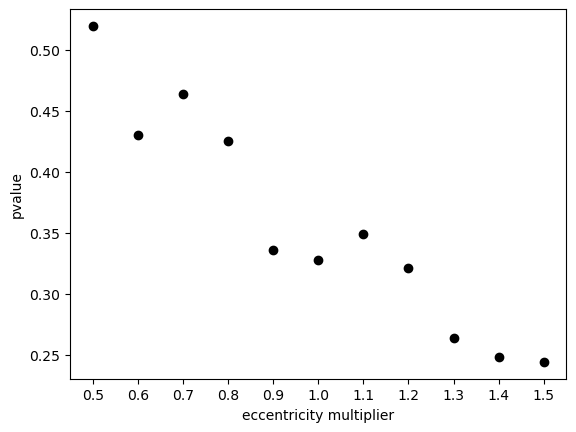

In [19]:
plt.plot([.5,.6,.7,.8,.9,1,1.1,1.2,1.3,1.4,1.5], trials_pvalue_mean, 'ko')
plt.ylabel("pvalue")
plt.xlabel('eccentricity multiplier')
plt.xticks([.5,.6,.7,.8,.9,1,1.1,1.2,1.3,1.4,1.5])

In [52]:
import statistics
statistics.stdev(ecc_pvalue[0])
print(min(ecc_pvalue[10]))
print(max(ecc_pvalue[10]))

0.002306872679744277
0.8052108861942998


# PDFs

Text(0.5, 0, 'period ratios')

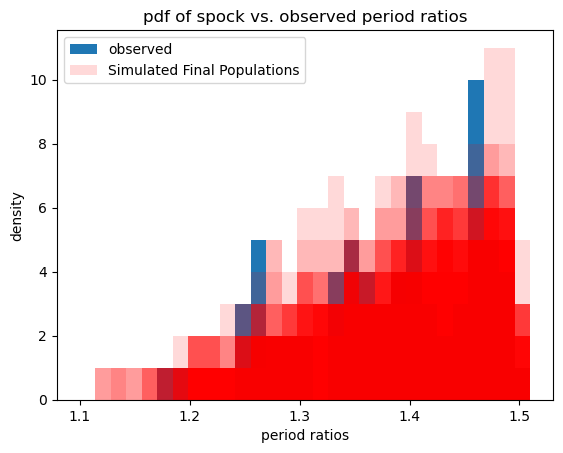

In [568]:
plt.title("pdf of spock vs. observed period ratios")
plt.hist(pratios_observed, bins=np.linspace(1.1, 1.51, bin_number), color="tab:blue", label = "observed")
for q in range(num_experiments):
    spock_p_list = trials_final_pratios[q]
    if q == 0: # add label to legend
        plt.hist(spock_p_list, bins=np.linspace(1.1, 1.51, bin_number), alpha=.15, color="red", label='Simulated Final Populations')
    else:
        plt.hist(spock_p_list, bins=np.linspace(1.1, 1.51, bin_number), alpha=.15, color="red")
plt.legend()
plt.ylabel("density")
plt.xlabel("period ratios")

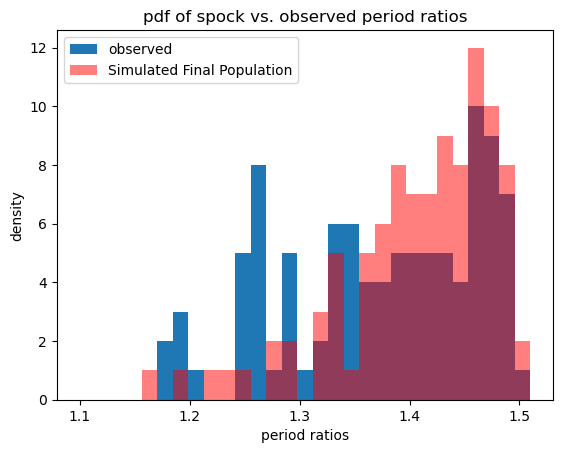

In [18]:
plt.title("pdf of spock vs. observed period ratios")
plt.hist(pratios_observed, bins=np.linspace(1.1, 1.51, bin_number), color="tab:blue", label = "observed")
plt.hist(spock_p_list, bins=np.linspace(1.1, 1.51, bin_number), alpha=.5, color="red", label='Simulated Final Population')
plt.ylabel("density")
plt.xlabel("period ratios")
plt.legend()

# CDFs

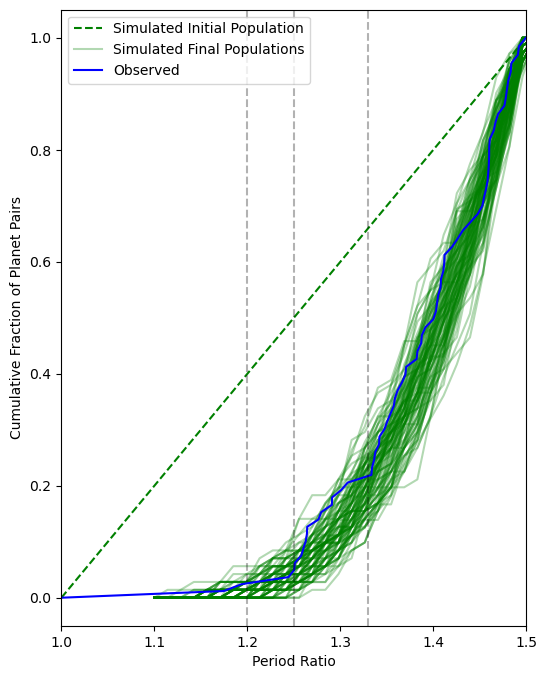

In [579]:
#Below we generate the plots for our population
#plt.style.use('./paper.mplstyle')
fig, ax = plt.subplots(figsize=(6,8))

ax.plot([1,1.5], [0,1], 'g--', label='Simulated Initial Population')
for q in range(num_experiments):
    spock_p_cumsum = trials_cumsum[q] #diff cumsum each time
    if q == 0:
        ax.plot(spock_p_base, [0]+list(spock_p_cumsum), c = 'green', alpha = 0.3, label='Simulated Final Populations')
    else:
        ax.plot(spock_p_base, [0]+list(spock_p_cumsum), c = 'green', alpha = 0.3)
ax.plot([1] + list(sorted(pratios_observed)), [0]+list(observed_period_cdf), c = 'blue', label='Observed')
ax.axvline(1.2, color='black', linestyle='--', alpha=0.3)
ax.axvline(1.25, color='black', linestyle='--', alpha=0.3)
ax.axvline(1.33, color='black', linestyle='--', alpha=0.3)
ax.legend()
ax.set_xlabel("Period Ratio")
ax.set_ylabel("Cumulative Fraction of Planet Pairs")
ax.set_xlim([1.,1.5])
fig.savefig('inneredge.pdf', bbox_inches='tight')

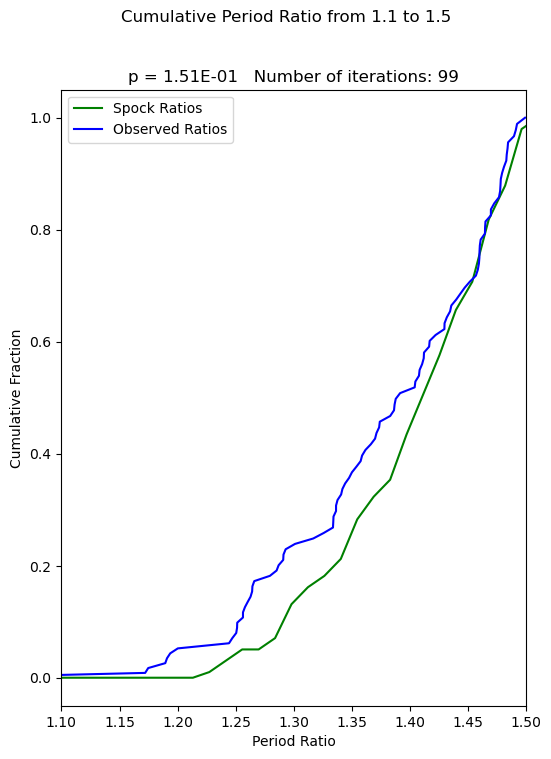

<Figure size 1000x100 with 0 Axes>

In [35]:
fig = plt.figure()
fig.set_figheight(8)
fig.set_figwidth(6)

plt.plot(spock_p_base, [0]+list(spock_p_cumsum), c = 'green')
plt.plot([1] + list(pratios_observed), [0]+list(observed_period_cdf), c = 'blue')
plt.legend(["Spock Ratios", "Observed Ratios"])
plt.suptitle("Cumulative Period Ratio from 1.1 to 1.5")
plt.title("p = " + '%.2E' % Decimal( str(trials_pvalue[-1])  ) + "   Number of iterations: " + str(len(spock_p_list)))
plt.xlabel("Period Ratio")
plt.ylabel("Cumulative Fraction")
plt.xlim(1.1,1.5)
plt.figure(figsize=(10, 1))
plt.show()

# KDEs with SPOCK

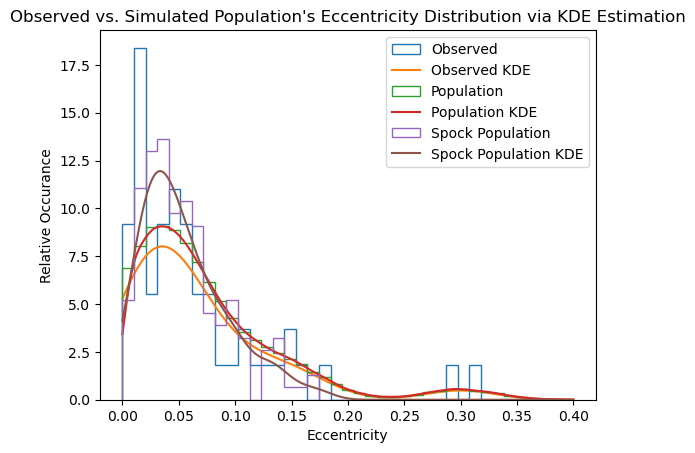

In [35]:
# Create a histogram of the original data
n, bins_e, patches = plt.hist(eccentricity, bins=np.linspace(0, 0.4, 40), histtype='step', density=True, label = 'Observed')

# Plot the kernel density curve of the original data
plt.plot(x_grid_e, kde_e(x_grid_e), label='Observed KDE')

# Create a histogram of the new samples
n_new, bins_new, patches_new = plt.hist(e_list, bins=bins_e, histtype='step', density=True, label = 'Population')

# Plot the kernel density curve of the new samples, e_list spock selected from
kde_new_e = gaussian_kde(e_list)
plt.plot(x_grid_e, kde_new_e(x_grid_e), label='Population KDE')

#plot the actual eccentricities spock took
n_s_new, bins_s_new, patches_s_new = plt.hist(spock_e_list, bins=bins_e, histtype='step', density=True, label = 'Spock Population')
kde_s_new = gaussian_kde(spock_e_list)
plt.plot(x_grid_e, kde_s_new(x_grid_e), label='Spock Population KDE')


# Set plot title, labels, and legend
plt.title("Observed vs. Simulated Population's Eccentricity Distribution via KDE Estimation")
plt.xlabel("Eccentricity")
plt.ylabel("Relative Occurance")
plt.legend()

# Show the plot
plt.show()

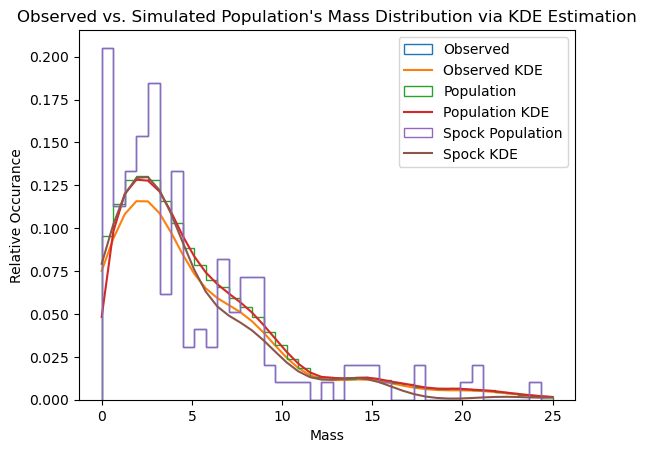

In [188]:
#masses after spock
# Create a histogram of the original data
n, bins, patches = plt.hist(mass, bins=np.linspace(0, 25, 40), histtype='step', density=True, label = 'Observed')

# Plot the kernel density curve of the original data
plt.plot(x_grid, kde(x_grid), label='Observed KDE')

# Create a histogram of the new samples, m_list spock selected from
n_new, bins_new, patches_new = plt.hist(m_list, bins=bins, histtype='step', density=True, label = 'Population')

# Plot the kernel density curve of the new samples
kde_new = gaussian_kde(m_list)
plt.plot(x_grid, kde_new(x_grid), label='Population KDE')

#plot spock mass distribution
ns, binss, patchess = plt.hist(mass, bins=np.linspace(0, 25, 40), histtype='step', density=True, label = 'Spock Population')
kdes=gaussian_kde(spock_m_list)
plt.plot(x_grid, kdes(x_grid), label='Spock KDE')

# Set plot title, labels, and legend
plt.title("Observed vs. Simulated Population's Mass Distribution via KDE Estimation")
plt.xlabel("Mass")
plt.ylabel("Relative Occurance")
plt.legend()


# Show the plot
plt.show()